In [ ]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
from google.colab import files 
import io

In [ ]:
color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()

In [ ]:
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['letters.data']), header = None)

Saving letters.data to letters (1).data


In [ ]:
class Perceptron(object):
  def __init__(self,eta = 0.001,n_iter=50,random_state = 1):
    self.eta  = eta
    self.n_iter = n_iter
    self.random_state = 1

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi , target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
class SLP(object):
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta  = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    self.errors_ = None
    self.network = []
    for i in range(0,len(X)):
      self.network.append(Perceptron(eta = self.eta, n_iter = self.n_iter, random_state= self.random_state))
    for i in range(0,len(X)):
      self.network[i].fit(X,y[i])
      if self.errors_ == None:
        self.errors_ = np.array([self.network[i].errors_])
      else:
        self.errors_ += np.array([self.network[i].errors_])
      self.errors_ = list(self.errors_)
    return self.network 
  def predict(self, X):
    self.predictedArr = []
    for i in range(0,len(X)):
      self.predictedArr.append(self.network[i].predict(X))
    return self.predictedArr
  def misclassified(self, X,y):
    predictedForCompare = self.predict(X)
    mis = 0
    for i in range(0,len(X)):
      for j in range(0,len(X)):
        if predictedForCompare[i][j] != y[i][j]:
          mis +=1
    return mis      
  def show(self, X):
      fi,ax = plt.subplots(nrows = 2, ncols = int(len(X)/2),figsize = (25,0))
      k = 0
      for i in range(0,2):
        for j in range(0,int(len(X)/2)):
          row = X[k]
          k += 1
          arrForDraw = np.array([])
          for m in range (0,35):
            arrForDraw = np.append(arrForDraw,row[m])
          ax[i][j].imshow(arrForDraw.reshape(7,5),cmap=reversed_color_map)  
          ax[i][j].axis('off')

In [ ]:
def damage(X,percent,seed = 1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)

  for index_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1],count,replace = False))
    for index_pixel in order:
      result[index_example][index_pixel] *=-1

  return result

In [ ]:
net = SLP()

In [ ]:
scliceY = list(np.array([ 4,  5,  6, 11, 15, 16, 18, 19, 20, 25]) + 35)

In [ ]:
X = df.iloc[[ 4,  5,  6, 11, 15, 16, 18, 19, 20, 25],0:35].values
y = df.iloc[[ 4,  5,  6, 11, 15, 16, 18, 19, 20, 25],scliceY].values
# [ 4  5  6 11 15 16 18 19 20 25]

In [ ]:
X

array([[ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
         1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
         1,  1,  1],
       [ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
         1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        -1, -1, -1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
        -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
         1,  1, -1],
       [ 1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
         1,  1,  1],
       [ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        -1, -1, -1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
         1,  1,  1],
       [-1

In [ ]:
y

array([[ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]])

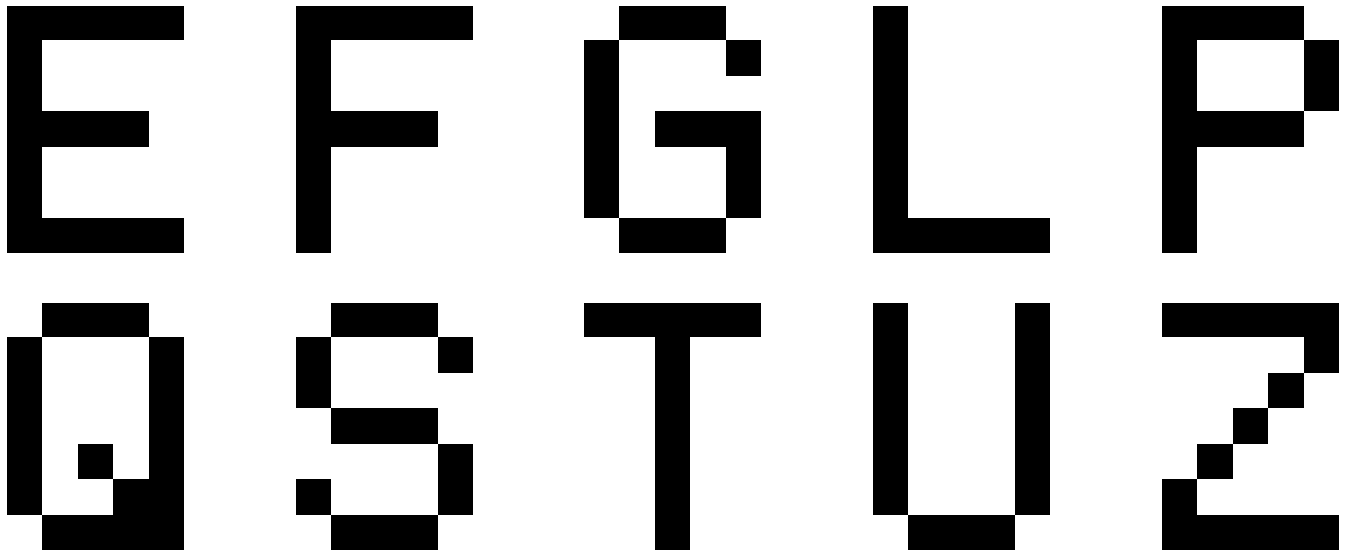

In [ ]:
net.show(X)

In [ ]:
net.fit(X,y)

In [ ]:
net.predict(X)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.errors_

[array([28, 15,  7,  6,  0,  0,  0,  0,  0,  0])]

In [ ]:
net.misclassified(X,y)

0

In [ ]:
damaged5 = damage(X,5)
damaged15 = damage(X,15)
damaged40 = damage(X,40)

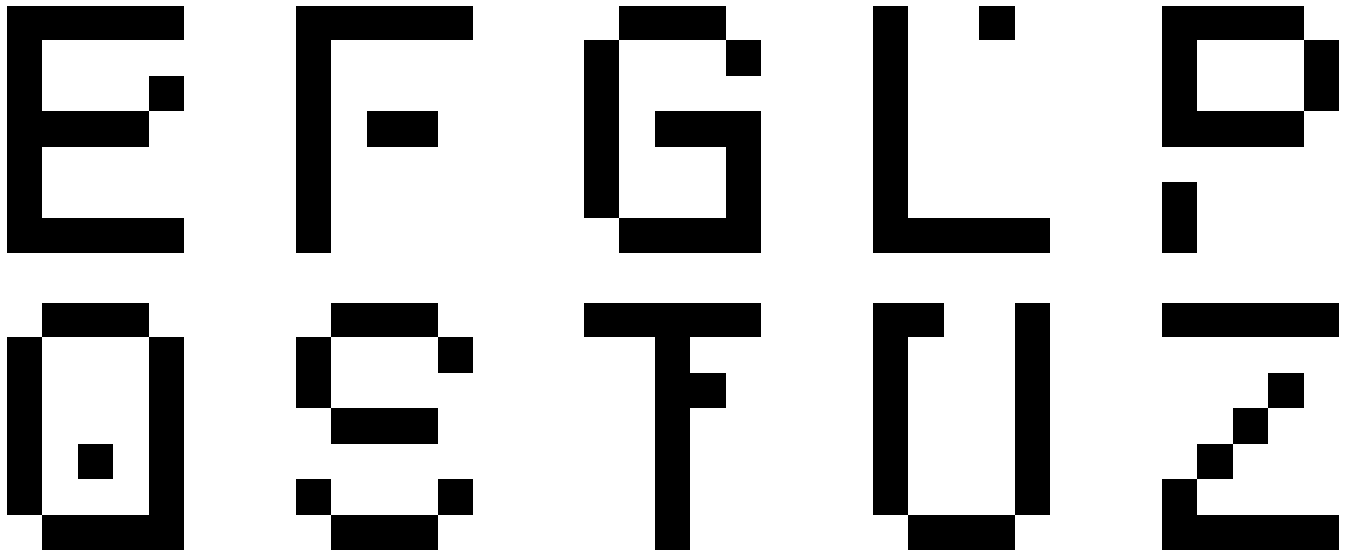

In [ ]:
net.show(damaged5)

In [ ]:
net.predict(damaged5)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified(damaged5,y)

2

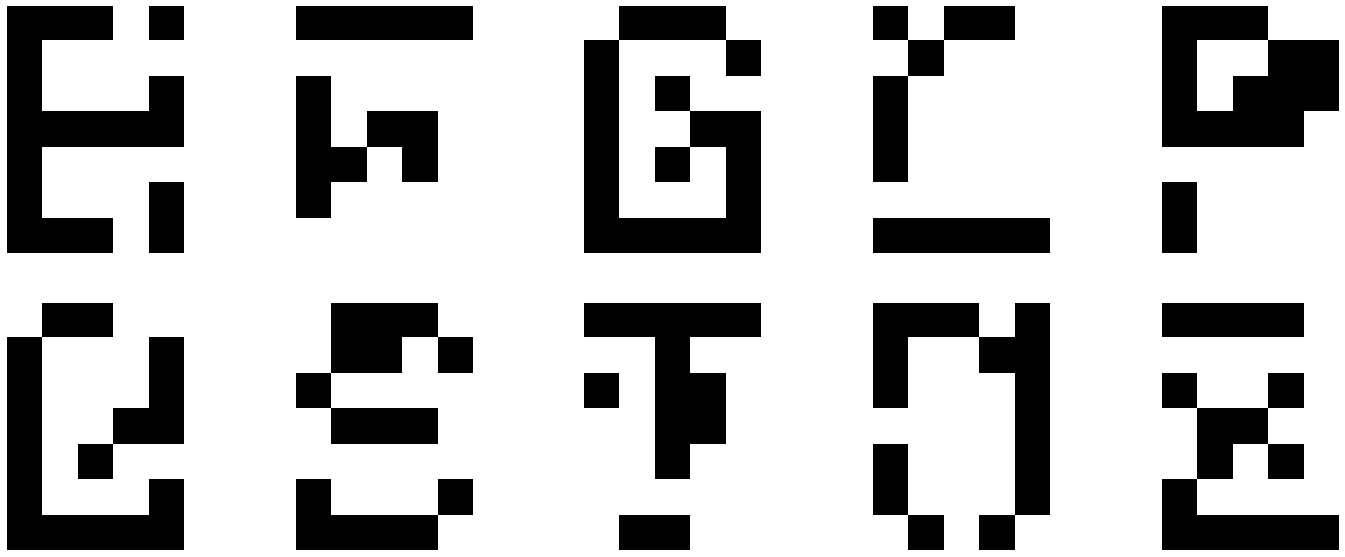

In [ ]:
net.show(damaged15)

In [ ]:
net.predict(damaged15)

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified(damaged15,y)

9

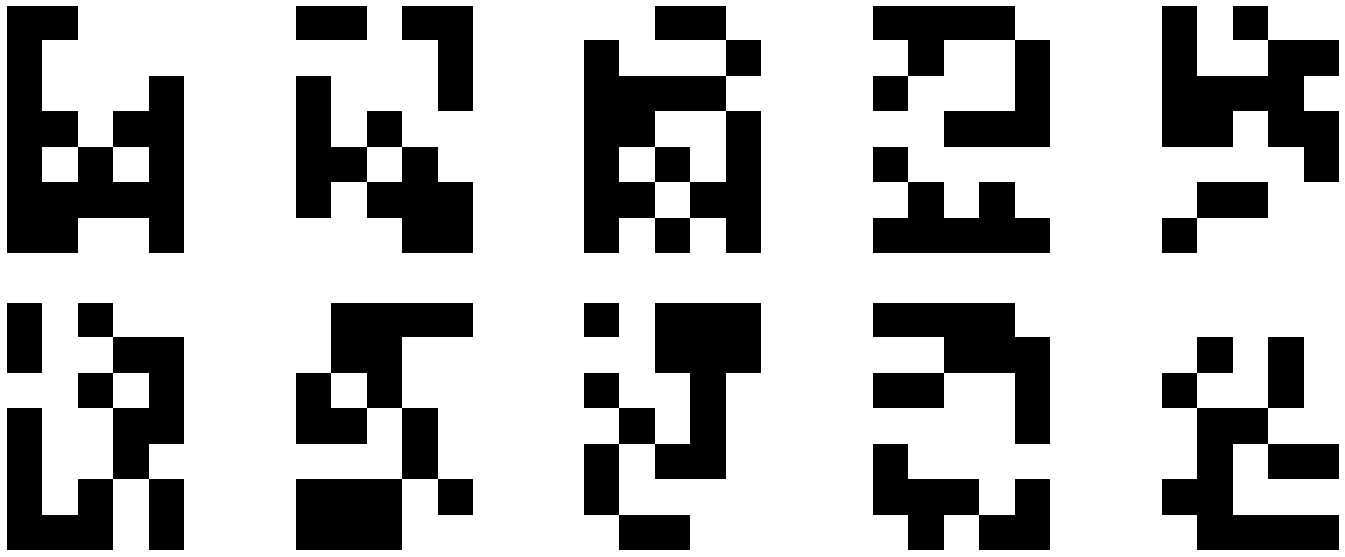

In [ ]:
net.show(damaged40)

In [ ]:
net.predict(damaged40)

[array([ 1, -1, -1,  1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1,  1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1,  1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1,  1, -1, -1, -1,  1]),
 array([-1,  1, -1,  1,  1,  1, -1, -1,  1, -1]),
 array([ 1,  1,  1,  1, -1,  1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1,  1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified(damaged40,y)

27